In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(35.697201099929956, 2.406163172869668),
 (-89.19025375844423, -52.89750220645372),
 (24.310829684660575, 75.83696399241484),
 (-71.03792568010493, -36.60224947229099),
 (86.98059814334934, 146.60184986647175),
 (-26.49835449845051, 51.16279180512086),
 (-86.73719868293556, -175.17254992178601),
 (-70.37650831611832, 2.1139355245947513),
 (56.302777621406875, 100.59689213731127),
 (-4.833845804912698, -74.21855395407187),
 (-15.771231913448744, 63.438910515347686),
 (78.61690907827179, -175.8613253475893),
 (-77.56581498896948, -129.8379397419538),
 (-25.225418860094393, 105.3162731640071),
 (-14.168487228032191, 167.06478207690145),
 (23.245296389712237, -159.84316939892653),
 (60.18731029689283, 137.73636874636787),
 (23.119551785014124, -33.69010923844888),
 (-72.26511487277816, -32.14192866384383),
 (-49.95096356574055, -151.2495286445387),
 (-70.99665119713873, -159.50160076871197),
 (-36.51062215431572, 20.909979648969028),
 (21.12132602092838, 122.29242804683048),
 (-29.3827451

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" 
city1 = "Boston"
qry_url = url +weather_api_key+"&q="+city1
url=url +weather_api_key


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | medea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sunel
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | vikhorevka
Processing Record 9 of Set 1 | requena
Processing Record 10 of Set 1 | grand gaube
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | solnechnyy
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | basco
Processing Record 21 of Set 1 | ballina
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | sao filipe
Processing R

Processing Record 39 of Set 4 | zhanatas
City not found. Skipping...
Processing Record 40 of Set 4 | abdulino
Processing Record 41 of Set 4 | pimenta bueno
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | miri
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | dzaoudzi
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | ouegoa
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | labuhan
Processing Record 4 of Set 5 | shitanjing
Processing Record 5 of Set 5 | mergui
City not found. Skipping...
Processing Record 6 of Set 5 | poronaysk
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | colac
Processing Record 9 of Set 5 | sur
Processing Record 

Processing Record 28 of Set 8 | goycay
City not found. Skipping...
Processing Record 29 of Set 8 | westpunt
City not found. Skipping...
Processing Record 30 of Set 8 | the valley
Processing Record 31 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 32 of Set 8 | port hardy
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | sao paulo de olivenca
Processing Record 35 of Set 8 | cidreira
Processing Record 36 of Set 8 | montanha
Processing Record 37 of Set 8 | dharmadam
Processing Record 38 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | kilindoni
Processing Record 41 of Set 8 | pineville
Processing Record 42 of Set 8 | kavieng
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | lethem
Processing Record 45 of Set 8 | bullhead city
Processing Record 46 of Set 8 | hwange
Processing Record 47 of Set 8 | raver
Processing Record 48 of Set 8 | lingao
Processing

Processing Record 13 of Set 12 | wanning
Processing Record 14 of Set 12 | tura
Processing Record 15 of Set 12 | solwezi
Processing Record 16 of Set 12 | vilyuysk
Processing Record 17 of Set 12 | adre
Processing Record 18 of Set 12 | khonsa
Processing Record 19 of Set 12 | progreso
Processing Record 20 of Set 12 | holme
Processing Record 21 of Set 12 | grand bank
Processing Record 22 of Set 12 | ngaoundere
Processing Record 23 of Set 12 | bac lieu
Processing Record 24 of Set 12 | rieti
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | bridlington
Processing Record 27 of Set 12 | aasiaat
Processing Record 28 of Set 12 | dunedin
Processing Record 29 of Set 12 | mombetsu
Processing Record 30 of Set 12 | vao
Processing Record 31 of Set 12 | joshimath
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | concepcion
Processing Record 34 of Set 12 | kyshtovka
Processing Record 35 of Set 12 | acapulco
Processing Record 36 of Set 12 | sahuaripa
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Medea,36.2642,2.7539,53.60,87,0,2.30,DZ,2021-01-29 22:36:48
1,Ushuaia,-54.8000,-68.3000,42.80,70,75,24.16,AR,2021-01-29 22:32:10
2,Sunel,24.3667,75.9667,50.65,44,0,3.56,IN,2021-01-29 22:36:49
3,Chokurdakh,70.6333,147.9167,-25.26,86,100,7.40,RU,2021-01-29 22:36:49
4,Vaini,-21.2000,-175.2000,75.20,94,90,11.50,TO,2021-01-29 22:36:49
5,Hermanus,-34.4187,19.2345,61.00,90,79,5.01,ZA,2021-01-29 22:32:36
6,Vikhorevka,56.1201,101.1636,-16.01,76,40,1.70,RU,2021-01-29 22:36:49
7,Requena,39.4883,-1.1004,64.40,55,0,5.75,ES,2021-01-29 22:36:49
8,Grand Gaube,-20.0064,57.6608,77.00,82,1,5.01,MU,2021-01-29 22:36:49
9,Rikitea,-23.1203,-134.9692,80.26,66,71,7.38,PF,2021-01-29 22:36:50


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lats

0      36.2642
1     -54.8000
2      24.3667
3      70.6333
4     -21.2000
        ...   
579    -0.9516
580    55.3815
581    14.4000
582   -28.7830
583    37.9333
Name: Lat, Length: 584, dtype: float64

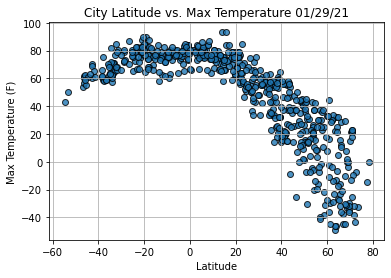

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

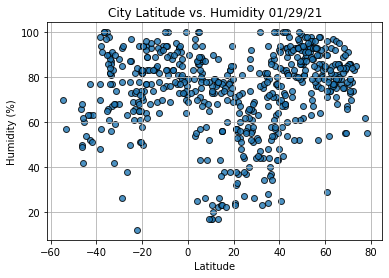

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

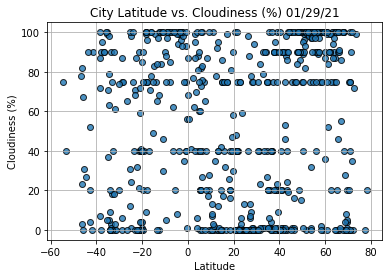

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()